In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
dataset = pd.read_csv("train.csv")

In [373]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pre Processing

In [374]:
pre_name=dataset['Name']

In [375]:
d=[]
for i in range(len(pre_name)):
    b=pre_name[i].split(',')[1]
    c=b.split()
    d.append(c[0])

In [376]:
plot1=np.unique(d,return_counts=True)

In [377]:
df=pd.DataFrame()
df['label']=plot1[0]
df['count']=plot1[1]
df

,label,count
0,Capt.,1
1,Col.,2
2,Don.,1
3,Dr.,7
4,Jonkheer.,1
5,Lady.,1
6,Major.,2
7,Master.,40
8,Miss.,182
9,Mlle.,2


In [378]:
dataset["first"]=d
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [379]:
dataset['first']=dataset['first'].replace(['Capt.', 'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.',
       'Master.', 'Mlle.', 'Mme.', 'Ms.', 'Rev.','Sir.', 'the'],'others')

In [380]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
first          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


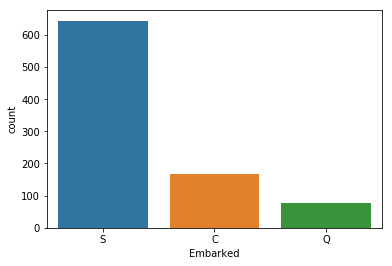

In [381]:
sns.countplot(x="Embarked", data=dataset)

In [382]:
dataset['Embarked']=dataset['Embarked'].fillna('S')
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())

In [383]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
first          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [384]:
from sklearn.preprocessing import LabelEncoder
ls=LabelEncoder()
dataset['Sex'] = ls.fit_transform(dataset['Sex'])
dataset['Embarked'] = ls.fit_transform(dataset['Embarked'])
dataset['first'] = ls.fit_transform(dataset['first'])

In [385]:
dataset.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,1
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,2,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,2,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,2,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,0,2


<function matplotlib.pyplot.show(*args, **kw)>

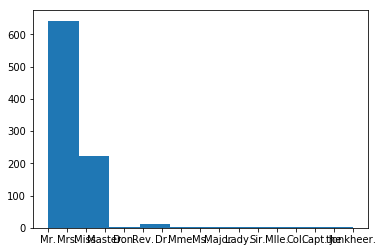

In [386]:
plt.hist(d)
plt.show

In [387]:
x=[]
for i in range(len(dataset)):
    x.append(dataset["Parch"][i]+dataset['SibSp'][i]+1)

In [388]:
dataset['total']=x

In [389]:
final = dataset.drop(['Parch','SibSp','Name','PassengerId','Cabin','Ticket'],axis=1)

In [390]:
final.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,first,total
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,2,2
2,1,3,0,26.0,7.9250,2,0,1
3,1,1,0,35.0,53.1000,2,2,2
4,0,3,1,35.0,8.0500,2,1,1


In [391]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int32
first       891 non-null int32
total       891 non-null int64
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.3 KB


In [392]:
final.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'first',
       'total'],
      dtype='object')

In [393]:
x = final.iloc[:,1:].values

x = x-x.mean()/x.std()
x.shape

(891, 7)

In [394]:
y = final.iloc[:,0].values
y.shape

(891,)

In [395]:
from sklearn.model_selection import train_test_split

In [396]:
x_train,x_test,y_train,y_test = train_test_split?

# Don't be confused by x_train,x_test,y_train,y_test Check shape first

In [398]:
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=1/3)

In [399]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(594, 7)
(594,)
(297, 7)
(297,)


In [400]:
from sklearn.tree import DecisionTreeClassifier

In [401]:
ds = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [402]:
ds.fit(x_train,x_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [403]:
ds.predict(y_train)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int6

In [404]:
ds.score(y_train,y_test)

0.8181818181818182

In [405]:
ds.score(x_train,x_test)

0.8518518518518519

In [406]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=ds, X=x_train, y=x_test, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.7927401129943503
0.04204835272201275
